In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy, AUC

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
NUM_EPOCHS = 40
BATCH_SIZE = 8
LEARN_RATE = 0.005

CLASS_MODE = "categorical"
COLOR_MODE = "grayscale"
TARGET_SIZE = (256,256)

In [28]:
TRAIN_DATA_DIRECTORY = "Covid19-dataset/train"
TEST_DATA_DIRECTORY = "Covid19-dataset/test"

In [29]:
train_image_data_generator = ImageDataGenerator(rescale=1.0/255,
                                            zoom_range=0.2,
                                            rotation_range=15,
                                            width_shift_range=0.05,
                                            height_shift_range=0.05)

training_iterator = train_image_data_generator.flow_from_directory(TRAIN_DATA_DIRECTORY,
                                                                class_mode=CLASS_MODE,
                                                                color_mode=COLOR_MODE,
                                                                target_size=TARGET_SIZE,
                                                                batch_size=BATCH_SIZE)


test_image_data_generator = ImageDataGenerator(rescale=1.0/255)

test_iterator = test_image_data_generator.flow_from_directory(TEST_DATA_DIRECTORY,
                                                        class_mode=CLASS_MODE,
                                                        color_mode=COLOR_MODE,
                                                        target_size=TARGET_SIZE,
                                                        batch_size=BATCH_SIZE)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [31]:
import tensorflow as tf

model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(256, 256, 1)))

model.add(tf.keras.layers.Conv2D(64, 5, strides=3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3,3)))

model.add(tf.keras.layers.Conv2D(32, 4, strides=2, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(16, 3, strides=1, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(8, 2, strides=1, activation="relu"))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Dense(8,activation="relu"))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3,activation="softmax"))

In [32]:
model.compile(
            optimizer = tf.keras.optimizers.Adam(learning_rate=LEARN_RATE),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()]
            )

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 84, 84, 64)        1664      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 28, 28, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 32)        32800     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 16)          4624      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 2, 2, 16)        

In [33]:
import time

start_time = time.perf_counter()

history = model.fit(
       training_iterator,
       steps_per_epoch = (training_iterator.samples)/BATCH_SIZE,
       epochs = NUM_EPOCHS,
       validation_data = test_iterator,
       validation_steps = (test_iterator.samples)/BATCH_SIZE
)

elapsed_time = time.perf_counter() - start_time
print()

print("Elapsed Time: " + str(elapsed_time) + " seconds")
print(str(elapsed_time/60) + " minutes")

Epoch 1/40
31/31 [==============================] - 16s 492ms/step - loss: 1.1316 - categorical_accuracy: 0.3865 - auc_2: 0.5170 - val_loss: 1.0918 - val_categorical_accuracy: 0.3939 - val_auc_2: 0.5379
Epoch 2/40
31/31 [==============================] - 17s 557ms/step - loss: 1.0813 - categorical_accuracy: 0.4422 - auc_2: 0.5631 - val_loss: 1.0919 - val_categorical_accuracy: 0.3939 - val_auc_2: 0.5406
Epoch 3/40
31/31 [==============================] - 16s 516ms/step - loss: 1.0800 - categorical_accuracy: 0.4422 - auc_2: 0.5664 - val_loss: 1.0904 - val_categorical_accuracy: 0.3939 - val_auc_2: 0.5478
Epoch 4/40
31/31 [==============================] - 15s 496ms/step - loss: 1.0765 - categorical_accuracy: 0.4422 - auc_2: 0.5750 - val_loss: 1.0895 - val_categorical_accuracy: 0.3939 - val_auc_2: 0.5845
Epoch 5/40
31/31 [==============================] - 14s 452ms/step - loss: 1.0398 - categorical_accuracy: 0.4821 - auc_2: 0.6652 - val_loss: 0.8597 - val_categorical_accuracy: 0.6667 - val

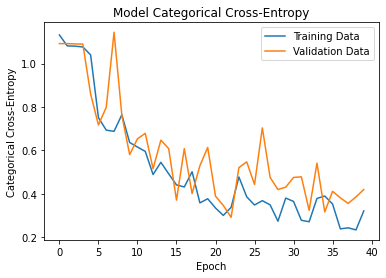

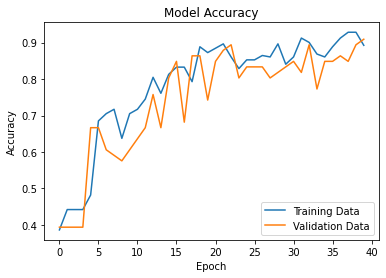

KeyError: 'auc'

In [34]:
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import CategoricalAccuracy, AUC

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Categorical Cross-Entropy')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper right')
plt.show()

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.show()

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('Area Under FOC Curve')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.show()

8/8 [==============================] - 2s 185ms/step
Classification Report:
                 precision    recall  f1-score   support

          Covid       0.58      0.54      0.56        26
         Normal       0.42      0.50      0.45        20
Viral Pneumonia       0.50      0.45      0.47        20

       accuracy                           0.50        66
      macro avg       0.50      0.50      0.50        66
   weighted avg       0.51      0.50      0.50        66

Confusion Matrix:


[Text(0, 0.5, 'Covid'),
 Text(0, 1.5, 'Normal'),
 Text(0, 2.5, 'Viral Pneumonia')]

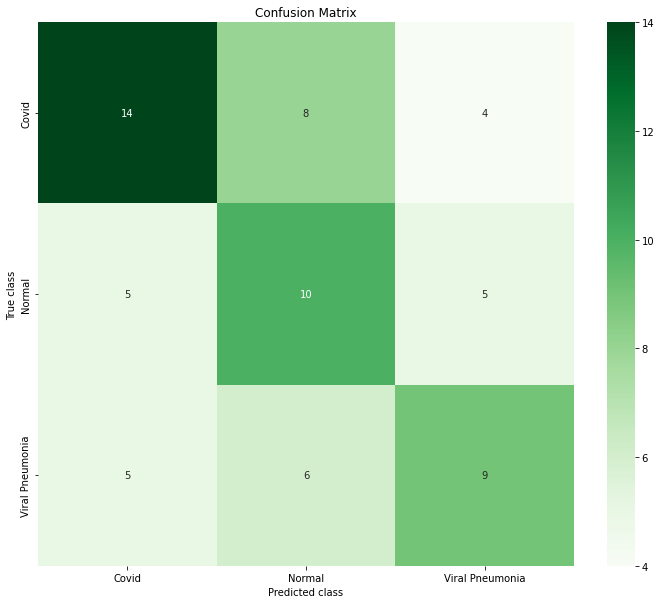

In [25]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model_predictions = model.predict(test_iterator, steps=(test_iterator.samples)/BATCH_SIZE)

predicted_classes = np.argmax(model_predictions, axis=1)
true_classes = test_iterator.classes
class_labels = list(test_iterator.class_indices.keys())

print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))   

print("Confusion Matrix:")
cm = confusion_matrix(true_classes,predicted_classes)
fig, ax = plt.subplots(figsize=(12, 10))
heatmap = sns.heatmap(cm, fmt='g', cmap='Greens', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)